<a href="https://colab.research.google.com/github/sepahpourka/Models/blob/main/Napier_40529878_Dissertation_ML_DL_TL_comparison_with_NSL_KDD%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [ ]:
train_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'



In [ ]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                      'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                      'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                      'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                      'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                      'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                      'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']


df = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

df.head()

df_test.head()

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
print('Label distribution Training set:')
print(df['outcome'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['outcome'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: outcome, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       17

**Step 1: Data Preprocessing:**

One-Hot-Encoding is used to convert all categorical features into binary features. The One-Hot-Endcoding requirement is that the input to this transformer must be an integer matrix expressing the values ​​taken with categorical (discrete) properties. The output will be a sparse matrix where each column corresponds to a possible value. It is assumed that the input properties have values ​​in the range [0, n_values]. Therefore, to convert each category to a number, the properties must first be converted with LabelEncoder.


In [ ]:
# columns are categorical, not yet binary: protocol_type (column 2), service (column 3), flag (column 4).

print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'outcome' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'outcome' has 38 categories


**LabelEncoder**

**Insert categorical features into a 2D numpy array**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

**Transform categorical features into numbers using LabelEncoder()**

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


**One-Hot-Encoding**

In [ ]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Missing columns in the test set are added**


In [ ]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_urh_i',
 'service_http_2784',
 'service_red_i',
 'service_http_8001',
 'service_harvest']

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


**New numeric columns are added to the main dataframe**

In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 124)
(22544, 124)


The dataset was divided into separate datasets for each attack category. Attack tags have been renamed for each. 0=Normal, 1=DoS, 2=Probe, 3=R2L, 4=U2R. In new datasets, the label column has been replaced with new values.

 DoS :

 Probe :

 R2L :

 U2R :

In [ ]:
labeldf=newdf['outcome']
labeldf_test=newdf_test['outcome']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



# put the new label column back
newdf['outcome'] = newlabeldf
newdf_test['outcome'] = newlabeldf_test

In [ ]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

# Filter all rows with label value other than itself
# in filter function

DoS_df=newdf[newdf['outcome'].isin(to_drop_DoS)];
Probe_df=newdf[newdf['outcome'].isin(to_drop_Probe)];
R2L_df=newdf[newdf['outcome'].isin(to_drop_R2L)];
U2R_df=newdf[newdf['outcome'].isin(to_drop_U2R)];



#test
DoS_df_test=newdf_test[newdf_test['outcome'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[newdf_test['outcome'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[newdf_test['outcome'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[newdf_test['outcome'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 124)
Dimensions of Probe: (78999, 124)
Dimensions of R2L: (68338, 124)
Dimensions of U2R: (67395, 124)

Test:
Dimensions of DoS: (17171, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


**Step 2: Feature Scaling**

In [ ]:
# Split dataframes into X & Y
# X Properties, Y result variables

X_DoS = DoS_df.drop('outcome',1)
Y_DoS = DoS_df.outcome

X_Probe = Probe_df.drop('outcome',1)
Y_Probe = Probe_df.outcome

X_R2L = R2L_df.drop('outcome',1)
Y_R2L = R2L_df.outcome

X_U2R = U2R_df.drop('outcome',1)
Y_U2R = U2R_df.outcome

# test set
X_DoS_test = DoS_df_test.drop('outcome',1)
Y_DoS_test = DoS_df_test.outcome

X_Probe_test = Probe_df_test.drop('outcome',1)
Y_Probe_test = Probe_df_test.outcome

X_R2L_test = R2L_df_test.drop('outcome',1)
Y_R2L_test = R2L_df_test.outcome

X_U2R_test = U2R_df_test.drop('outcome',1)
Y_U2R_test = U2R_df_test.outcome


<ipython-input-159-3302c6bf50ec>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS = DoS_df.drop('outcome',1)
<ipython-input-159-3302c6bf50ec>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe = Probe_df.drop('outcome',1)
<ipython-input-159-3302c6bf50ec>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L = R2L_df.drop('outcome',1)
<ipython-input-159-3302c6bf50ec>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R = U2R_df.drop('outcome',1)
<ipython-input-159-3302c6bf50ec>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS_test 

**Since the column names will be deleted at this stage, we save the column names for later use.**

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [ ]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

**Step 3: Feature Selection:**

---

**Recursive Feature Elimination (RFE), top 13 features (as a group)**

# Random Forest

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10,n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)

rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [ ]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)


In [ ]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [ ]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

**Summary of features selected by RFE**

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)


Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'count', 'srv_count', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'level', 'service_ecr_i', 'flag_SF']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'level', 'Protocol_type_tcp', 'service_eco_i', 'service_private']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'level', 'service_ftp_data']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'num_compromised', 'root_shell', 'num_file_creations', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_srv_d

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)


(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


**Step 4: Build the model:**

Classifier is trained for all features and for reduced features, for later comparison.

The classifier model itself is stored in the clf variable.

In [ ]:
# all features
clf_DoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_Probe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_R2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_U2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2)

In [ ]:
# selected features
clf_rfeDoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeProbe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeR2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeU2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Step 5: Prediction & Evaluation (validation):**


---



Using all Features for each category

Confusion Matrices


---



DoS¶

In [ ]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf_DoS.predict(X_DoS_test)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:10]

array([[0.6, 0.4],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.4, 0.6],
       [1. , 0. ]])

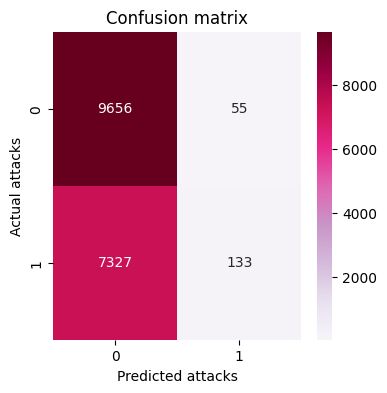

In [ ]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()



**Probe**

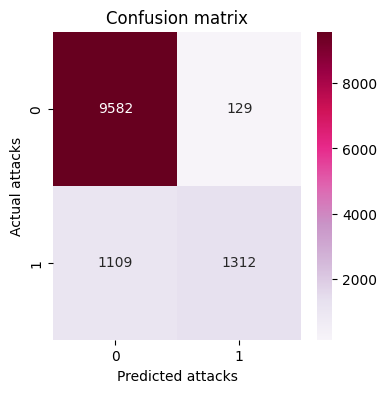

In [ ]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**R2L**

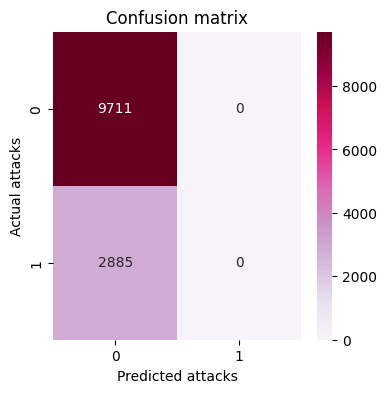

In [ ]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**U2R**

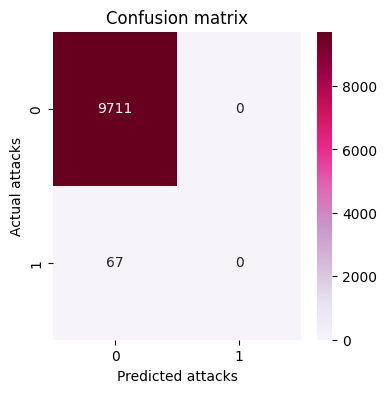

In [ ]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Confusion matrix calculation
confusion = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99825 (+/- 0.00255)
Precision: 0.99946 (+/- 0.00178)
Recall: 0.99692 (+/- 0.00449)
F-measure: 0.99812 (+/- 0.00274)


**Probe**

In [ ]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99744 (+/- 0.00308)
Precision: 0.99762 (+/- 0.00453)
Recall: 0.99489 (+/- 0.00591)
F-measure: 0.99637 (+/- 0.00415)


**U2R**

In [ ]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99898 (+/- 0.00158)
Precision: 0.99918 (+/- 0.00114)
Recall: 0.91066 (+/- 0.14425)
F-measure: 0.94698 (+/- 0.11065)


**R2L**

In [ ]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99682 (+/- 0.00174)
Precision: 0.99539 (+/- 0.00579)
Recall: 0.99680 (+/- 0.00443)
F-measure: 0.99618 (+/- 0.00206)


**Using 13 Features for each category**


Confusion Matrices

DoS

In [ ]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

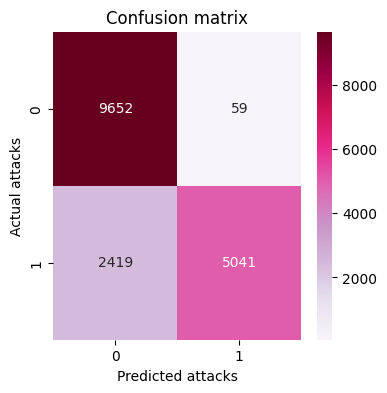

In [ ]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# Confusion matrix calculation
confusion = confusion_matrix(Y_DoS_test, Y_DoS_pred2)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Probe**

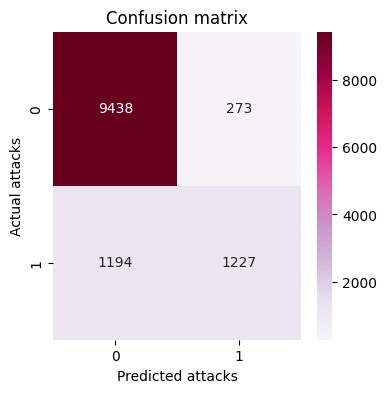

In [ ]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# Confusion matrix calculation
confusion = confusion_matrix(Y_Probe_test, Y_Probe_pred2)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()




**R2L**

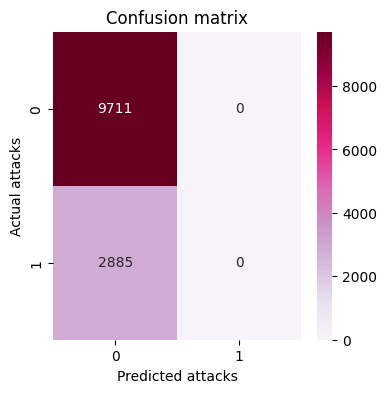

In [ ]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# Confusion matrix calculation
confusion = confusion_matrix(Y_R2L_test, Y_R2L_pred2)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()


**U2R**

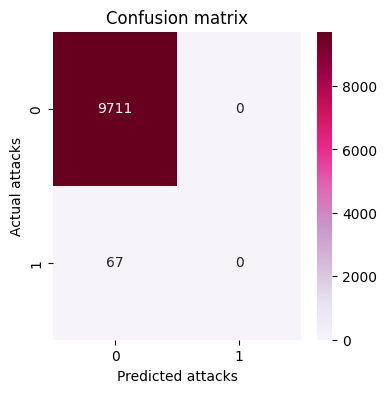

In [ ]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# Confusion matrix calculation
confusion = confusion_matrix(Y_U2R_test, Y_U2R_pred2)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**


In [ ]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99814 (+/- 0.00114)
Precision: 0.99893 (+/- 0.00234)
Recall: 0.99745 (+/- 0.00280)
F-measure: 0.99799 (+/- 0.00288)


**Probe**

In [ ]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99654 (+/- 0.00409)
Precision: 0.99639 (+/- 0.00354)
Recall: 0.99391 (+/- 0.00475)
F-measure: 0.99509 (+/- 0.00528)


**R2L**

In [ ]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99587 (+/- 0.00347)
Precision: 0.99433 (+/- 0.00629)
Recall: 0.99595 (+/- 0.00400)
F-measure: 0.99494 (+/- 0.00505)


**U2R**

In [ ]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99806 (+/- 0.00193)
Precision: 0.97370 (+/- 0.07901)
Recall: 0.86900 (+/- 0.20113)
F-measure: 0.93102 (+/- 0.08832)


# KNeighbors


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN_DoS=KNeighborsClassifier()
clf_KNN_Probe=KNeighborsClassifier()
clf_KNN_R2L=KNeighborsClassifier()
clf_KNN_U2R=KNeighborsClassifier()

clf_KNN_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_KNN_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_KNN_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_KNN_U2R.fit(X_U2R, Y_U2R.astype(int))


KNeighborsClassifier()

 **DoS**

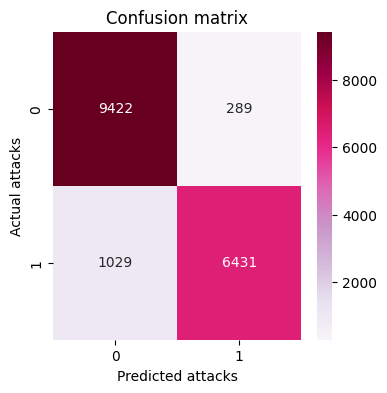

In [ ]:
Y_DoS_pred=clf_KNN_DoS.predict(X_DoS_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Probe**

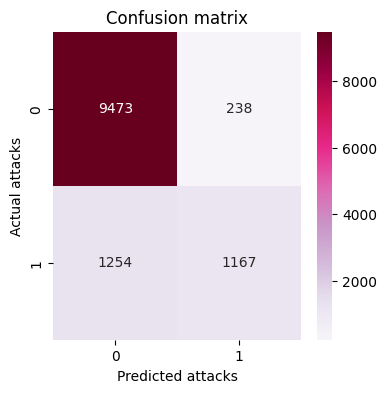

In [ ]:
Y_Probe_pred=clf_KNN_Probe.predict(X_Probe_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**R2L**

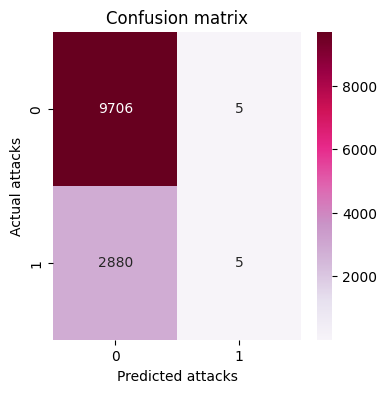

In [ ]:
Y_R2L_pred=clf_KNN_R2L.predict(X_R2L_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**U2R**

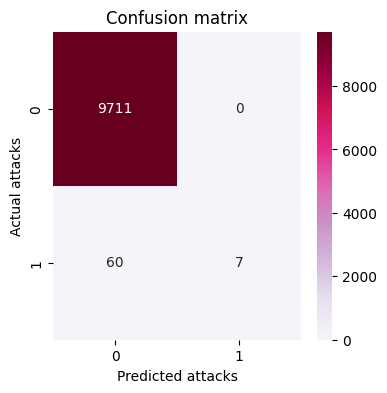

In [ ]:
Y_U2R_pred=clf_KNN_U2R.predict(X_U2R_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Cross Validation: Accuracy, Precision, Recall, F-measure**

**DoS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99767 (+/- 0.00208)
Precision: 0.99679 (+/- 0.00342)
Recall: 0.99786 (+/- 0.00246)
F-measure: 0.99732 (+/- 0.00240)


**Probe**

In [ ]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99720 (+/- 0.00306)
Precision: 0.99732 (+/- 0.00341)
Recall: 0.99391 (+/- 0.00697)
F-measure: 0.99559 (+/- 0.00482)


**R2L**

In [ ]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99127 (+/- 0.00426)
Precision: 0.98621 (+/- 0.00818)
Recall: 0.98922 (+/- 0.00675)
F-measure: 0.98768 (+/- 0.00596)


**U2R**

In [ ]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99785 (+/- 0.00250)
Precision: 0.94566 (+/- 0.12266)
Recall: 0.90435 (+/- 0.12716)
F-measure: 0.91862 (+/- 0.08694)


# SVM


In [ ]:
from sklearn.svm import SVC

clf_SVM_DoS=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Probe=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_R2L=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_U2R=SVC(kernel='linear', C=1.0, random_state=0)

clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))

SVC(kernel='linear', random_state=0)

**DoS**

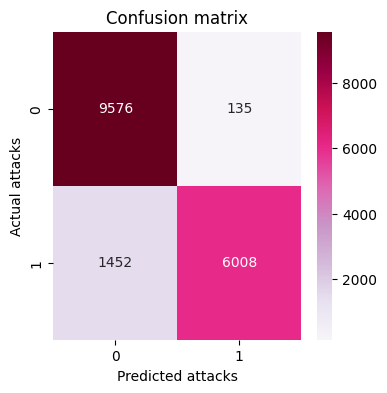

In [ ]:
Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

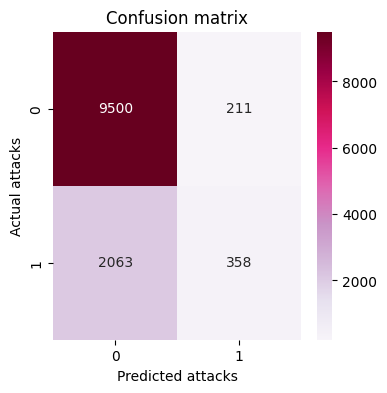

In [ ]:
Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

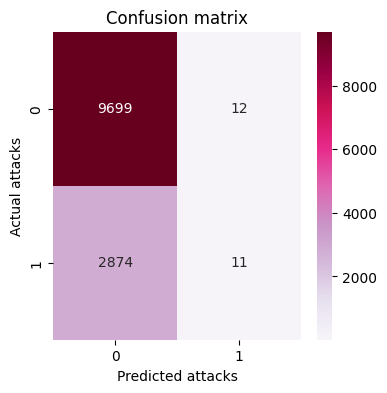

In [ ]:
Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

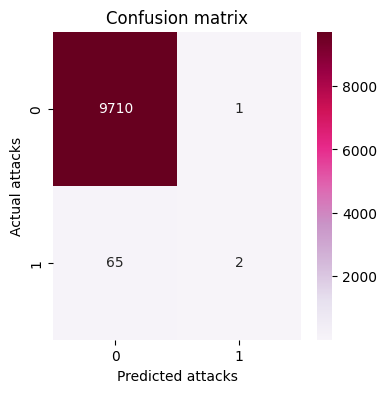

In [ ]:
Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)
# Confusion matrix calculation
confusion = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**DoS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99371 (+/- 0.00445)
Precision: 0.99094 (+/- 0.00856)
Recall: 0.99464 (+/- 0.00494)
F-measure: 0.99278 (+/- 0.00508)


**Probe**

In [ ]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99415 (+/- 0.00393)
Precision: 0.99201 (+/- 0.00792)
Recall: 0.98968 (+/- 0.00675)
F-measure: 0.99082 (+/- 0.00614)


**R2L**

In [ ]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99016 (+/- 0.00450)
Precision: 0.98194 (+/- 0.00969)
Recall: 0.99069 (+/- 0.00369)
F-measure: 0.98620 (+/- 0.00617)


**U2R**

In [ ]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99826 (+/- 0.00205)
Precision: 0.93764 (+/- 0.11509)
Recall: 0.94829 (+/- 0.11230)
F-measure: 0.93787 (+/- 0.07048)


# Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier

clf_voting_DoS = VotingClassifier(estimators=[('rf', clf_DoS), ('knn', clf_KNN_DoS), ('svm', clf_SVM_DoS)], voting='hard')
clf_voting_Probe = VotingClassifier(estimators=[('rf', clf_Probe), ('knn', clf_KNN_Probe), ('svm', clf_SVM_Probe)], voting='hard')
clf_voting_R2L = VotingClassifier(estimators=[('rf', clf_R2L), ('knn', clf_KNN_R2L), ('svm', clf_SVM_R2L)], voting='hard')
clf_voting_U2R = VotingClassifier(estimators=[('rf', clf_U2R), ('knn', clf_KNN_U2R), ('svm', clf_SVM_U2R)], voting='hard')

clf_voting_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_voting_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_voting_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_voting_U2R.fit(X_U2R, Y_U2R.astype(int))


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     n_jobs=2)),
                             ('knn', KNeighborsClassifier()),
                             ('svm', SVC(kernel='linear', random_state=0))])

**DoS**

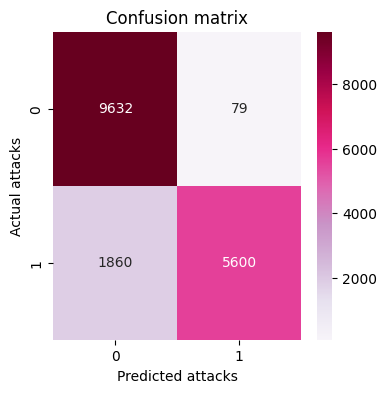

In [ ]:
Y_DoS_pred=clf_voting_DoS.predict(X_DoS_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**Probe**

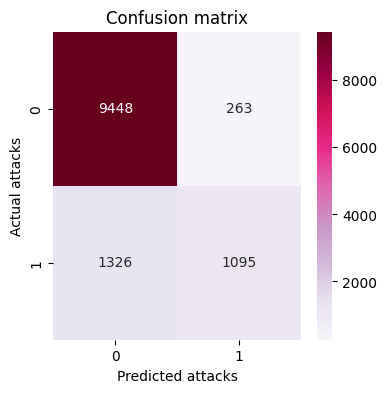

In [ ]:
Y_Probe_pred=clf_voting_Probe.predict(X_Probe_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**R2L**

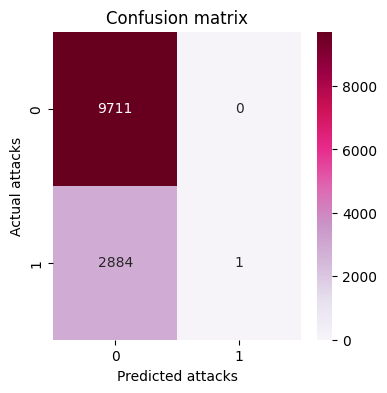

In [ ]:
Y_R2L_pred=clf_voting_R2L.predict(X_R2L_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

**U2R**

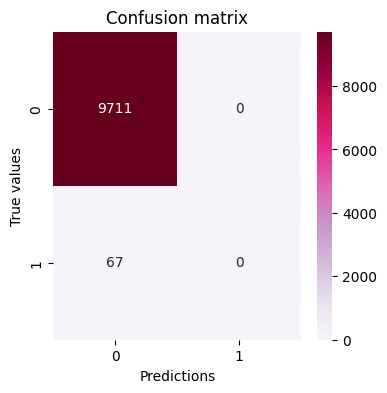

In [ ]:
Y_U2R_pred=clf_voting_U2R.predict(X_U2R_test)

# Confusion matrix calculation
confusion = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

**DoS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99825 (+/- 0.00215)
Precision: 0.99839 (+/- 0.00312)
Recall: 0.99732 (+/- 0.00339)
F-measure: 0.99792 (+/- 0.00278)


**Probe**

In [ ]:
accuracy = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-mesaure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99753 (+/- 0.00233)
Precision: 0.99737 (+/- 0.00427)
Recall: 0.99484 (+/- 0.00582)
F-mesaure: 0.99586 (+/- 0.00475)


**R2L**

In [ ]:
accuracy = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99436 (+/- 0.00296)
Precision: 0.99008 (+/- 0.00663)
Recall: 0.99488 (+/- 0.00356)
F-measure: 0.99261 (+/- 0.00317)


**U2R**

In [ ]:
accuracy = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99898 (+/- 0.00204)
Precision: 0.98495 (+/- 0.05920)
Recall: 0.94866 (+/- 0.11282)
F-measure: 0.96756 (+/- 0.06245)


# Deep Learning

**Deep Learning Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test_url = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'

# Loading data
data_train = pd.read_csv(test_url, header=None)
data_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                      'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                      'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                      'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                      'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                      'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                      'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']

# Defining categorical columns
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']

# Data preprocessing
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

# Data scaling
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns=cols)
    return std_df

# Data preprocessing
scaled_train = preprocess(data_train)

# Separation of data into features and labels
x = scaled_train.drop(['outcome', 'level'], axis=1).values
y = scaled_train['outcome'].values

# Dimension reduction with PCA
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

# Converting labels to integers
y = y.astype('int')

# Separating data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

# Defining the RNN model architecture
model = Sequential()
model.add(LSTM(units=32, input_shape=(x_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(x_train.reshape((x_train.shape[0], x_train.shape[1], 1)), y_train, epochs=10, batch_size=32,
                    validation_data=(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)), y_test))

# Prediction using test data
y_pred = model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)))
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Number of original features is 116 and of reduced features is 20
Epoch 1/10
564/564 [==============================] - 13s 19ms/step - loss: 0.3557 - accuracy: 0.8344 - val_loss: 0.2530 - val_accuracy: 0.9006
Epoch 2/10
564/564 [==============================] - 7s 13ms/step - loss: 0.2297 - accuracy: 0.9104 - val_loss: 0.2224 - val_accuracy: 0.9173
Epoch 3/10
564/564 [==============================] - 10s 18ms/step - loss: 0.2088 - accuracy: 0.9160 - val_loss: 0.1914 - val_accuracy: 0.9293
Epoch 4/10
564/564 [==============================] - 7s 13ms/step - loss: 0.1970 - accuracy: 0.9194 - val_loss: 0.1740 - val_accuracy: 0.9339
Epoch 5/10
564/564 [==============================] - 10s 18ms/step - loss: 0.1846 - accuracy: 0.9252 - val_loss: 0.1739 - val_accuracy: 0.9290
Epoch 6/10
564/564 [==============================] - 7s 13ms/step - loss: 0.1815 - accuracy: 0.9287 - val_loss: 0.2260 - val_accuracy: 0.9029
Epoch 7/10
564/564 [==============================] - 10s 18ms/step - loss

141/141 [==============================] - 1s 4ms/step
Accuracy: 0.9445553337768907
Precision: 0.9430523917995444
Recall: 0.9613003095975232
F1 Score: 0.9520889229589881


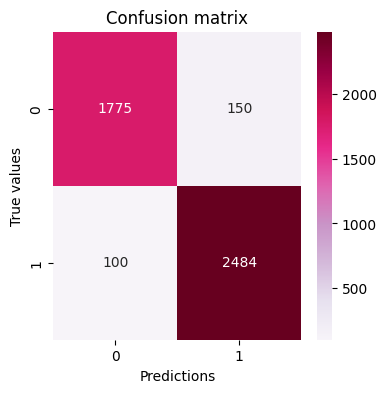

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediction using test data
y_pred = model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1)))
y_pred = (y_pred > 0.5)

# Calculating Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix calculation
confusion = confusion_matrix(y_test, y_pred)

# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(confusion, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Creating an instance of the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=32, input_shape=(10, 1)))

# Get RNN model parameters
rnn_params = rnn_model.layers[0].get_config()

# Viewing RNN model parameters
print("RNN model parameters:")
print(rnn_params)

RNN model parameters:
{'name': 'simple_rnn_1', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 10, 1), 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 32, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0}


# Deep Learning using LTSM

**Deep Learning using LTSM**

In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=a860df7d7823828782a0250097b1b78b34fe9447e2a052a19f6ff043b3d3a1c4
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers

**Set Column Names**

In [ ]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

**Setup Data Location**

In [ ]:
train = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'
test21 = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest-21.txt'

train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
test_data21 = pd.read_csv(test21, names= feature)
data= pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
# number of attack labels
data['label'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [ ]:
# Redistribute across common attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(data)

In [ ]:
# distribution of attack classes
data.label.value_counts()

normal    77054
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: label, dtype: int64

In [ ]:
label = pd.DataFrame(data.label)

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data

(148517, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.112481,tcp,ftp_data,SF,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,4
1,-0.112481,udp,other,SF,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4
2,-0.112481,tcp,private,S0,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,Dos,0
3,-0.112481,tcp,http,SF,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,4
4,-0.112481,tcp,http,SF,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112481,tcp,smtp,SF,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,...,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,4
148513,-0.112481,tcp,http,SF,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,4
148514,-0.112481,tcp,http,SF,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,Dos,0
148515,-0.112481,udp,domain_u,SF,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,...,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4


In [ ]:
data.drop(labels= ['label'], axis=1, inplace=True)
print(data.shape)

(148517, 42)


In [ ]:
# one-hot-encoding categorical columns
data = pd.get_dummies(data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
print(data.shape)

(148517, 123)


In [ ]:
y_data= data['intrusion']
X_data= data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_data.shape,'\ny_train has shape:',y_data.shape)

X_train has shape: (148517, 122) 
y_train has shape: (148517,)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y_data)

X_data=np.array(X_data)
y_data=np.array(y_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(118813, 122) 
 (29704, 122)


In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))

In [ ]:
model = Sequential() # initializing model
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
# summary of model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             47872     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3

In [ ]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [ ]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=30, batch_size=5000,validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 13s 75ms/step - loss: 1.5190 - accuracy: 0.7732 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3392 - val_accuracy: 0.8375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.9966 - accuracy: 0.8369 - precision: 0.9818 - recall: 0.2591 - val_loss: 0.5440 - val_accuracy: 0.8372 - val_precision: 0.9422 - val_recall: 0.7833
Epoch 3/30
20/20 [==============================] - 0s 12ms/step - loss: 0.4353 - accuracy: 0.8567 - precision: 0.9207 - recall: 0.8129 - val_loss: 0.3778 - val_accuracy: 0.9006 - val_precision: 0.9326 - val_recall: 0.8258
Epoch 4/30
20/20 [==============================] - 0s 19ms/step - loss: 0.3389 - accuracy: 0.9149 - precision: 0.9442 - recall: 0.8240 - val_loss: 0.2958 - val_accuracy: 0.9230 - val_precision: 0.9507 - val_recall: 0.8416
Epoch 5/30
20/20 [==============================] - 0s 18ms/step - loss: 0.2630 - accuracy:

In [ ]:
X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [ ]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test,verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

929/929 [==============================] - 5s 5ms/step - loss: 0.0493 - accuracy: 0.9840 - precision: 0.9855 - recall: 0.9832
Test results - Loss: 0.04929157346487045 - Accuracy: 98.40089082717896%


In [ ]:
results = model.evaluate(X_test, y_test,batch_size = 128)

233/233 [==============================] - 1s 4ms/step - loss: 0.0493 - accuracy: 0.9840 - precision: 0.9855 - recall: 0.9832


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy', 'precision', 'recall']
[0.04929157719016075, 0.9840089082717896, 0.9855238795280457, 0.9832345843315125]


Text(0.5, 0, 'Epochs')

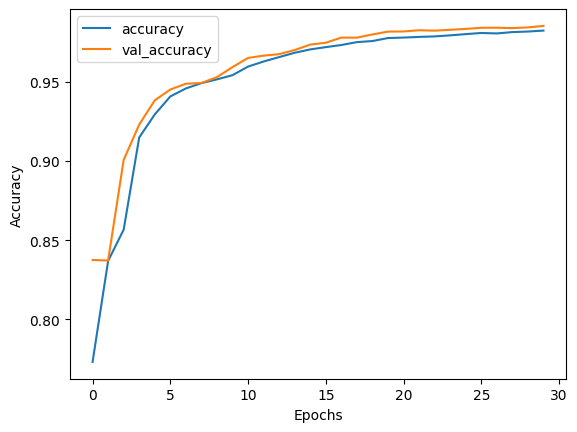

In [ ]:
# # Plot of accuracy vs epoch for train and test dataset
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title("Plot of accuracy vs epoch for train and test dataset")
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.show()
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

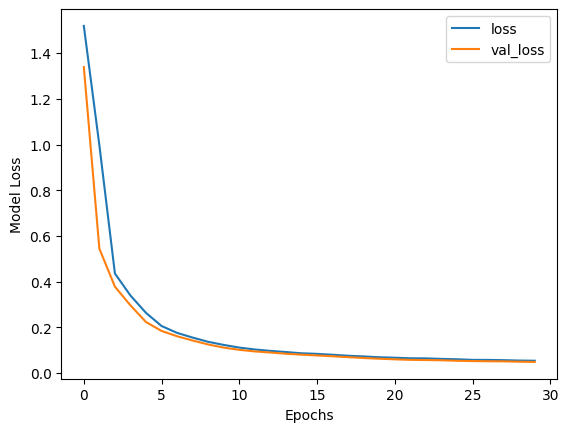

In [ ]:
# # Plot of loss vs epoch for train and test dataset
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title("Plot of loss vs epoch for train and test dataset")
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.ylabel('Model Loss')
plt.xlabel('Epochs')

In [ ]:
from sklearn.metrics import classification_report

y_predict = model.predict(X_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

929/929 [==============================] - 4s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10688
           1       0.96      0.99      0.97      2749
           2       0.89      0.81      0.85       792
           3       0.00      0.00      0.00        25
           4       0.99      0.98      0.99     15450

    accuracy                           0.98     29704
   macro avg       0.77      0.76      0.76     29704
weighted avg       0.98      0.98      0.98     29704



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[10664     3     0     0    21]
 [    6  2708     3     0    32]
 [    0     5   641     0   146]
 [    2     4    11     0     8]
 [   68    97    69     0 15216]]


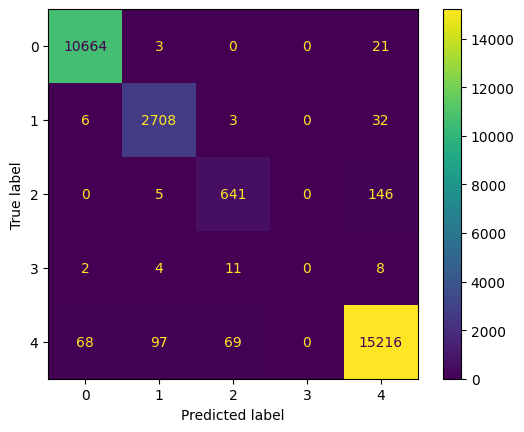

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)
# plot the confusion matrix
print("Confusion Matrix:\n", cm)
cm_display.plot()
plt.show()

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

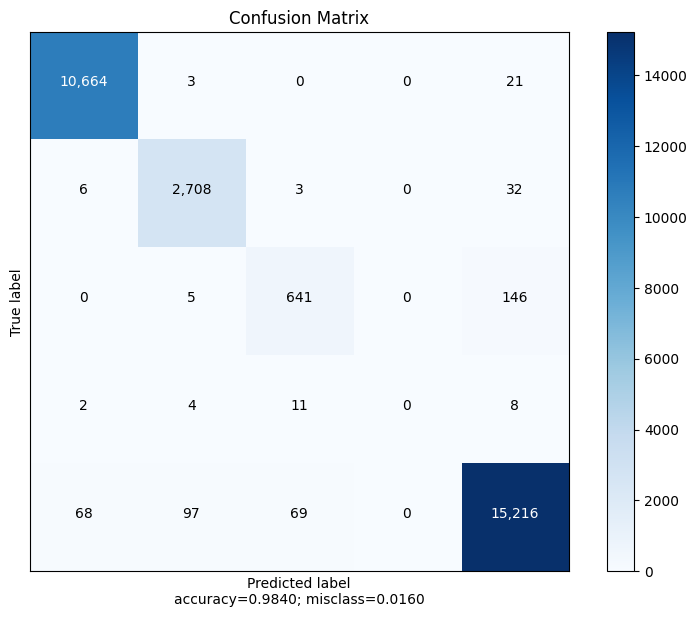

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      normalize=False,
                      target_names=[],
                      title="Confusion Matrix")

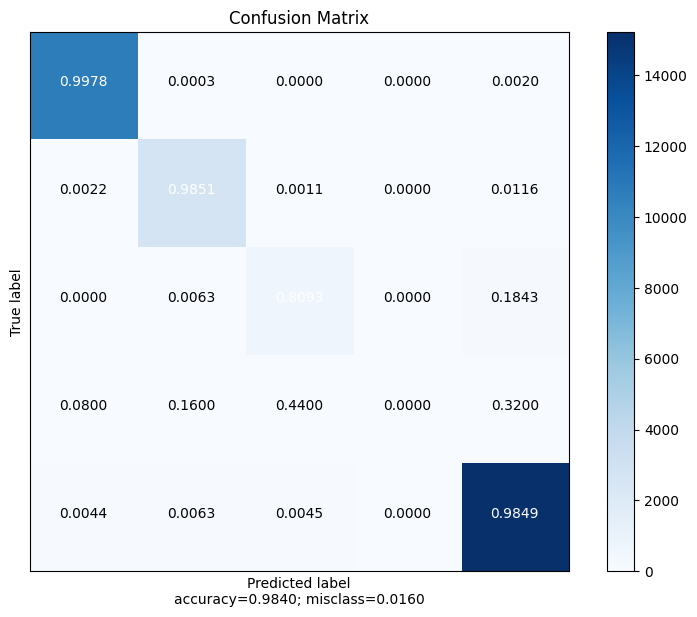

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      normalize=True,
                      target_names=[],
                      title="Confusion Matrix")

Saving our model in HDF5 format we need to use (.h5) format.

In [ ]:
model.save("NSL-KDD.LSTM", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the model can be done by using the load_model function

In [ ]:
import tensorflow as tf
from keras import models

new_model = models.load_model("NSL-KDD.LSTM")

In [ ]:
history = new_model.fit(X_train, y_train, epochs=30, batch_size=5000,validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 6s 72ms/step - loss: 0.0519 - accuracy: 0.9826 - precision: 0.9837 - recall: 0.9817 - val_loss: 0.0475 - val_accuracy: 0.9850 - val_precision: 0.9862 - val_recall: 0.9846
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.0512 - accuracy: 0.9831 - precision: 0.9842 - recall: 0.9820 - val_loss: 0.0481 - val_accuracy: 0.9843 - val_precision: 0.9855 - val_recall: 0.9838
Epoch 3/30
20/20 [==============================] - 0s 15ms/step - loss: 0.0539 - accuracy: 0.9814 - precision: 0.9827 - recall: 0.9805 - val_loss: 0.0466 - val_accuracy: 0.9859 - val_precision: 0.9869 - val_recall: 0.9856
Epoch 4/30
20/20 [==============================] - 0s 14ms/step - loss: 0.0510 - accuracy: 0.9828 - precision: 0.9840 - recall: 0.9819 - val_loss: 0.0461 - val_accuracy: 0.9860 - val_precision: 0.9869 - val_recall: 0.9853
Epoch 5/30
20/20 [==============================] - 0s 13ms/step - loss: 0.0489 - accuracy: 0.9837 - precisi

# Deep Learning using LTSM with Transfer Learning

In [431]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers



feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]


train = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'
test21 = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest-21.txt'

In [432]:
train_data = pd.read_csv(train,names=feature)
test_data = pd.read_csv(test,names=feature)
test_data21 = pd.read_csv(test21, names= feature)
data= pd.concat([train_data, test_data], ignore_index=True)

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [433]:
# remove attribute 'difficulty_level'
data.drop(['difficulty'],axis=1,inplace=True)

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [435]:
data.describe().T

# number of attack labels
data['label'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [436]:
# Redistribute across common attack class
# Type of attacks: DoS (Denial of Service attacks), R2L (Root to Local attacks), U2R (User to Root attack) and Probe (Probing attacks).
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(data)

In [437]:
# distribution of attack classes
data.label.value_counts()

normal    77054
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: label, dtype: int64

In [438]:
label = pd.DataFrame(data.label)

# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data

(148517, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.112481,tcp,ftp_data,SF,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,4
1,-0.112481,udp,other,SF,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4
2,-0.112481,tcp,private,S0,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,Dos,0
3,-0.112481,tcp,http,SF,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,4
4,-0.112481,tcp,http,SF,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112481,tcp,smtp,SF,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,...,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,4
148513,-0.112481,tcp,http,SF,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,4
148514,-0.112481,tcp,http,SF,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,Dos,0
148515,-0.112481,udp,domain_u,SF,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,...,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,4


In [439]:
data.drop(labels= ['label'], axis=1, inplace=True)
print(data.shape)

(148517, 42)


In [440]:
# one-hot-encoding categorical columns
data = pd.get_dummies(data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
print(data.shape)

(148517, 123)


In [441]:
y_data= data['intrusion']
X_data= data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_data.shape,'\ny_train has shape:',y_data.shape)

X_train has shape: (148517, 122) 
y_train has shape: (148517,)


In [442]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y_data)

X_data=np.array(X_data)
y_data=np.array(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=42)
print('We can now split the the training data')
print('X_train has shape:',X_train.shape,'\nX_test has shape:',X_test.shape)

We can now split the the training data
X_train has shape: (118813, 122) 
X_test has shape: (29704, 122)


In [443]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))



In [444]:
print('X_train now has shape:',X_train.shape,'\nX_test now has shape:',X_test.shape)

X_train now has shape: (118813, 1, 122) 
X_test now has shape: (29704, 1, 122)


In [445]:
model = Sequential() # initializing model
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

# defining loss function, optimizer, metrics and then compiling model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Accuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# summary of model layers
model.summary()

# lets save the model now
model.save("NSL-KDD.LSTM.keras")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 1, 64)             47872     
                                                                 
 dropout_22 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_34 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_23 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_35 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_17 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 50)              

In [446]:
# Convert training data to type float
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# training the model on training dataset
history = model.fit(X_train, y_train, epochs=30, batch_size=5000,validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 8s 95ms/step - loss: 1.5174 - accuracy: 0.7465 - precision_29: 0.0000e+00 - recall_29: 0.0000e+00 - val_loss: 1.3342 - val_accuracy: 0.8289 - val_precision_29: 0.0000e+00 - val_recall_29: 0.0000e+00
Epoch 2/30
20/20 [==============================] - 0s 14ms/step - loss: 0.9622 - accuracy: 0.8302 - precision_29: 0.9392 - recall_29: 0.3187 - val_loss: 0.5102 - val_accuracy: 0.8294 - val_precision_29: 0.8822 - val_recall_29: 0.7927
Epoch 3/30
20/20 [==============================] - 0s 14ms/step - loss: 0.4595 - accuracy: 0.8408 - precision_29: 0.8914 - recall_29: 0.8145 - val_loss: 0.4003 - val_accuracy: 0.8487 - val_precision_29: 0.9305 - val_recall_29: 0.8306
Epoch 4/30
20/20 [==============================] - 0s 14ms/step - loss: 0.3747 - accuracy: 0.8711 - precision_29: 0.9394 - recall_29: 0.8299 - val_loss: 0.3440 - val_accuracy: 0.9117 - val_precision_29: 0.9445 - val_recall_29: 0.8322
Epoch 5/30
20/20 [==========================

In [447]:
# Convert testing data to type float
X_test = X_test.astype(float)
y_test = y_test.astype(float)

# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test,verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

929/929 [==============================] - 5s 5ms/step - loss: 0.0483 - accuracy: 0.9841 - precision_29: 0.9851 - recall_29: 0.9834
Test results - Loss: 0.048293884843587875 - Accuracy: 98.41435551643372%


In [448]:
results = model.evaluate(X_test, y_test,batch_size = 128)

print(model.metrics_names)
print(results)

233/233 [==============================] - 1s 5ms/step - loss: 0.0483 - accuracy: 0.9841 - precision_29: 0.9851 - recall_29: 0.9834
['loss', 'accuracy', 'precision_29', 'recall_29']
[0.04829388111829758, 0.9841435551643372, 0.9850937724113464, 0.9833692312240601]


Text(0.5, 0, 'Epochs')

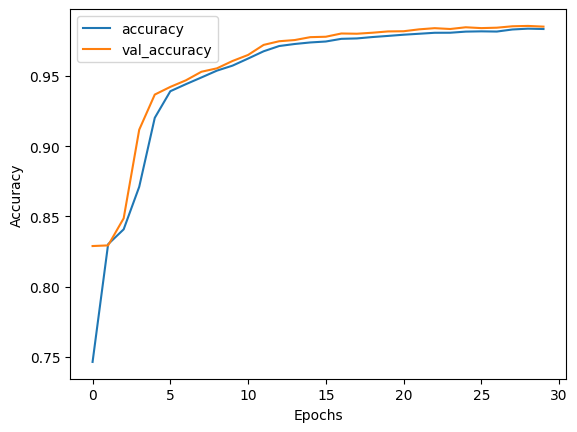

In [449]:
# # Plot of accuracy vs epoch for train and test dataset
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

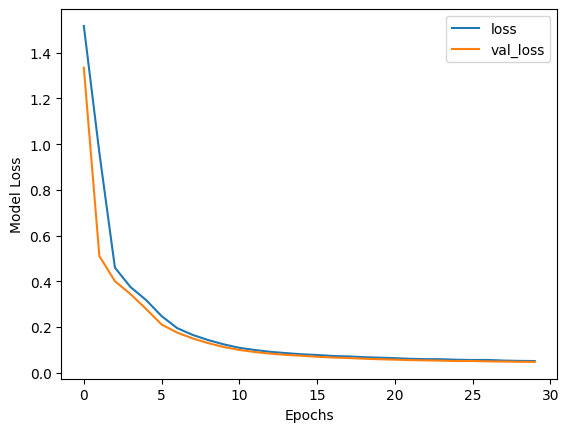

In [450]:
# # Plot of loss vs epoch for train and test dataset
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.ylabel('Model Loss')
plt.xlabel('Epochs')

In [451]:
from sklearn.metrics import classification_report

y_predict = model.predict(X_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

929/929 [==============================] - 4s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10688
           1       0.96      0.98      0.97      2749
           2       0.84      0.88      0.86       792
           3       0.00      0.00      0.00        25
           4       0.99      0.98      0.99     15450

    accuracy                           0.98     29704
   macro avg       0.76      0.77      0.76     29704
weighted avg       0.98      0.98      0.98     29704



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [481]:
y_predict

array([[1.8837585e-07, 1.6798868e-08, 5.4671367e-05, 1.2254390e-07,
        9.9994504e-01],
       [5.3758714e-07, 1.6405256e-09, 1.7941614e-06, 1.7250811e-08,
        9.9999762e-01],
       [4.8996975e-07, 2.4450113e-09, 3.3609695e-06, 2.5889086e-08,
        9.9999607e-01],
       ...,
       [7.4897624e-05, 8.3428475e-08, 7.9508472e-06, 7.0414842e-07,
        9.9991632e-01],
       [3.7545783e-06, 8.7778295e-05, 9.2479324e-01, 1.0937044e-03,
        7.4021511e-02],
       [2.1131941e-04, 1.1062233e-07, 5.7184961e-06, 9.4450479e-07,
        9.9978191e-01]], dtype=float32)

Confusion Matrix:
 [[10665     4     0     0    19]
 [    6  2705     3     0    35]
 [    0     1   696     0    95]
 [    0     2    14     0     9]
 [   61   105   117     0 15167]]


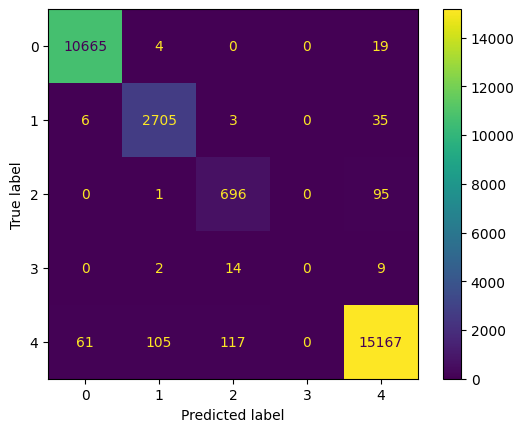

In [452]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)
# plot the confusion matrix
print("Confusion Matrix:\n", cm)
cm_display.plot()
plt.show()

In [453]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

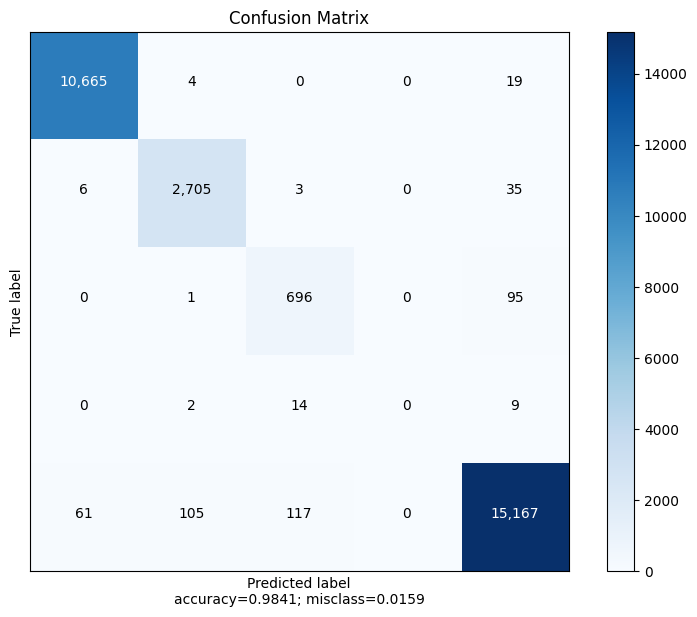

In [454]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      normalize=False,
                      target_names=[],
                      title="Confusion Matrix")

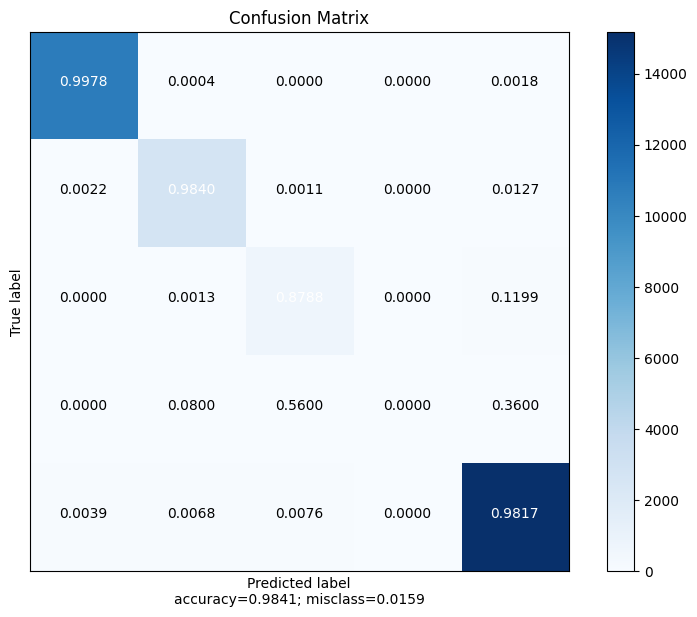

In [455]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      normalize=True,
                      target_names=[],
                      title="Confusion Matrix")

Et voila, you've loaded your model :)

Now, while filepath is pretty clear, what do custom_objects and compile mean?

If the model you want to load includes custom layers or other custom classes or functions, you can pass them to the loading mechanism via the custom_objects argument.

Keras (n.d.; FAQ)

Indeed - by default, custom objects are not saved with the model. You can however specify them with the custom_objects attribute upon loading it, like this (Keras, n.d.):

model = load_model('my_model.h5', custom_objects={'AttentionLayer': AttentionLayer})
Now, the compile indicates whether the model must be compiled or not. It's True by default. If you set it to False, you'll have to compile it manually again using model.compile, but in return you'll get the freedom to tweak the configuration options a bit.

Predictions for new data
With the model we loaded, we can generate predictions for new data:

# Generate a prediction with loaded model
sample_index = 788
sample_input, sample_target = input_test[sample_index], target_test[sample_index]
sample_input_array = np.array([sample_input])
predictions = loaded_model.predict(sample_input_array)
prediction = np.argmax(predictions[0])
print(f'Ground truth: {sample_target} - Prediction: {prediction}')
Here, for sample 788, we take the true input and true target, feed the input to the model, and store the prediction. Subsequently, we print it, to check whether it's correct when we run the py file:

Ground truth: 9 - Prediction: 9
Hooray!

In [456]:
import tensorflow as tf
from keras import models

new_model = models.load_model("NSL-KDD.LSTM.keras")

new_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 1, 64)             47872     
                                                                 
 dropout_22 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_34 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_23 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_35 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_17 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 50)              

In [457]:
# defining loss function, optimizer, metrics and then compiling model
#new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Accuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
#new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
#history = new_model.fit(X_train, y_train, epochs=30, batch_size=5000,validation_split=0.2)

In [458]:
##new_model.add(tf.keras.layers.Flatten())
#new_model.add(tf.keras.layers.Dense(units=50))

#model.add(Flatten())
#model.add()
# output layer with softmax activation
#new_model.add(Dense(units=5,activation='softmax'))

#new_model.pop()
new_model.build()

new_model.summary()

# defining loss function, optimizer, metrics and then compiling model
#new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Accuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = new_model.fit(X_train, y_train, epochs=30, batch_size=5000,validation_split=0.2)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 1, 64)             47872     
                                                                 
 dropout_22 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_34 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_23 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_35 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_17 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 50)              

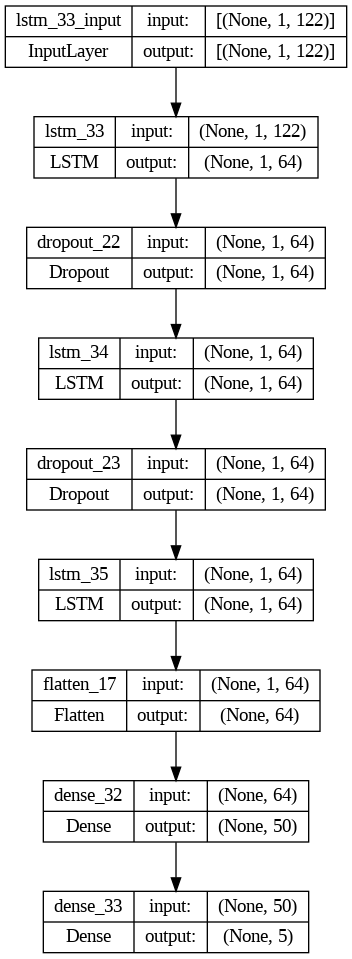

In [459]:
from keras.utils import plot_model
plot_model(new_model, show_shapes=True, to_file='new_model.png')

In [460]:
print('X_train now has shape:',X_train.shape,'\nX_test now has shape:',X_test.shape)
print('y_train now has shape:',y_train.shape,'\ny_test now has shape:',y_test.shape)

X_train now has shape: (118813, 1, 122) 
X_test now has shape: (29704, 1, 122)
y_train now has shape: (118813, 5) 
y_test now has shape: (29704,)


In [482]:
y_predict1 = new_model.predict(X_test)

929/929 [==============================] - 54s 58ms/step


In [483]:
y_predict1



array([[1.4145010e-07, 1.4869199e-08, 3.4546068e-05, 6.2436868e-08,
        9.9996519e-01],
       [4.1785191e-07, 1.9940503e-09, 1.2407777e-06, 1.0274643e-08,
        9.9999833e-01],
       [3.3455711e-07, 2.5546723e-09, 2.1376450e-06, 1.3415353e-08,
        9.9999750e-01],
       ...,
       [8.5852094e-05, 1.6921169e-07, 1.0407079e-05, 8.6003280e-07,
        9.9990273e-01],
       [3.2392529e-06, 7.1829694e-05, 8.6585915e-01, 6.9095439e-04,
        1.3337487e-01],
       [2.0143509e-04, 2.0217325e-07, 7.3496681e-06, 1.0475878e-06,
        9.9979001e-01]], dtype=float32)

In [484]:
y_predict1.shape

(29704, 5)

In [463]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 1, 64)             47872     
                                                                 
 dropout_22 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_34 (LSTM)              (None, 1, 64)             33024     
                                                                 
 dropout_23 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_35 (LSTM)              (None, 1, 64)             33024     
                                                                 
 flatten_17 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 50)              

In [478]:
X_test = X_test.astype(float)
y_test = y_test.astype(float)


print('Shape of y_test: ',y_test.shape)

print('Shape of X_test: ',X_test.shape)

print('Shape of y_pred: ',y_pred.shape)


# predicting target attribute on testing dataset
test1_results = new_model.evaluate(X_test, y_test,batch_size = 128)

#test1_results = new_model.evaluate(X_test1, y_test1, verbose=1)

Shape of y_test:  (29704,)
Shape of X_test:  (29704, 1, 122)
Shape of y_pred:  (29704, 5)


InvalidArgumentError: ignored

In [ ]:
print(f'Test results - Loss: {test1_results[0]} - Accuracy: {test1_results[1]*100}%')

In [ ]:
results = new_model.evaluate(X_test, y_test, batch_size = 128)

print(new_model.metrics_names)
print(results)